In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

1. PostgreSQL connection details (ess database connection).

In [ ]:
# PostgreSQL connection details
username = '(...)'
password = '(...)'
host = '(...)'
port = '(...)'
database = 'ess'

# create connection using create_engine (which acts as the main interface between Python code and the database)
engine = create_engine(
    f'postgresql+pg8000://{username}:{password}@{host}:{port}/{database}'
    )

2. Import DataFrame from silver layer and wfm_employees table.

In [7]:
# fetch the data from PostgreSQL ess server - silver layer (cleansed data) and assign it to DataFrame
df = df_ess_silver = pd.read_sql(
    'SELECT * '
    'FROM silver.wfm_employees',
    con=engine # con=engine in pd.read_sql() tells pandas which database connection to use when executing the SQL query
)

In [13]:
# set 'nessie' as index
df = df.set_index('nessie')
df.head(1)

,employment_type,country,name,contract,gcm_level,hourly_rate,competence,daily_rate,active_flag,insert_date
nessie,,,,,,,,,,
90262315,External,BE,Mariem Douafi,MNP,Regular,46.25,Customer Support Assistant,370.0,Active,2025-12-03 10:11:18.230356


3. Employment type structure.

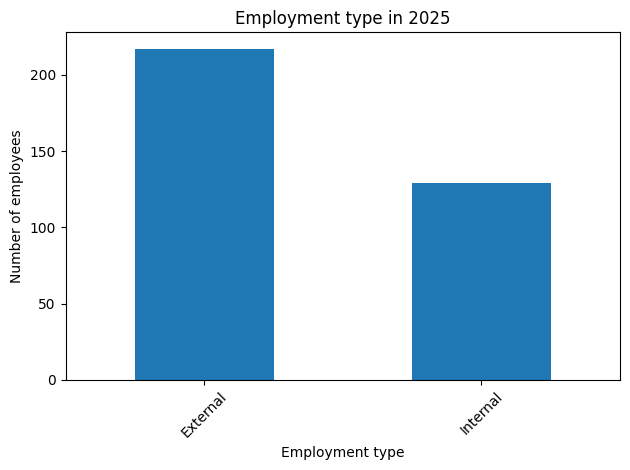

In [73]:
# filter out inactive employees
active = df[df['active_flag'] == 'Active']

active['employment_type'].value_counts().plot(
    kind='bar',
    xlabel='Employment type',
    ylabel='Number of employees',
    title='Employment type in 2025',
    rot=45
)

plt.tight_layout()
plt.show()

4. Contract distribution.

<sup>Clean up the data.</sup>

In [ ]:
# filter out inactive employees
contract_split = df[df['active_flag'] == 'Active']
# check if filter was applied
contract_split.value_counts('active_flag')
# remove 'Lot2' from the contract and drop columns
contract_split['contract'] = contract_split['contract'].str.split(' ', expand=True).drop([1, 2], axis=1)
# rename column after using .split() method
contract_split = contract_split.rename(columns={0:'contract'})

<sup>Plot bar chart.</sup>

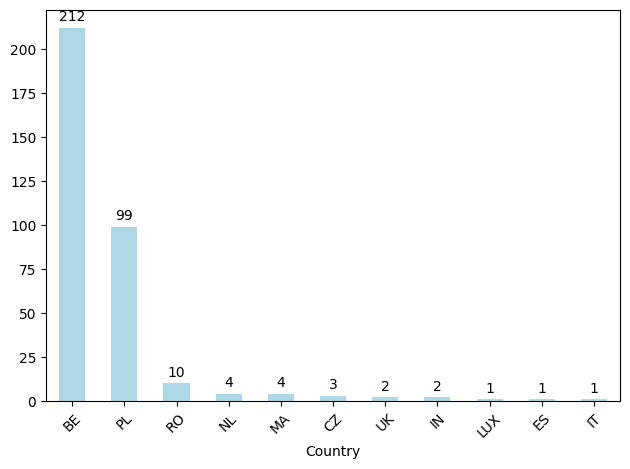

In [74]:
country = contract_split['country'].value_counts()
ax = country.plot(
    kind='bar',
    color='lightblue',
    xlabel='Country',
    rot=45
)
# Add labels equal to bar heights (Y values)
ax.bar_label(ax.containers[0], padding=3)  # padding moves labels above bars

plt.tight_layout()
plt.show()
